findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

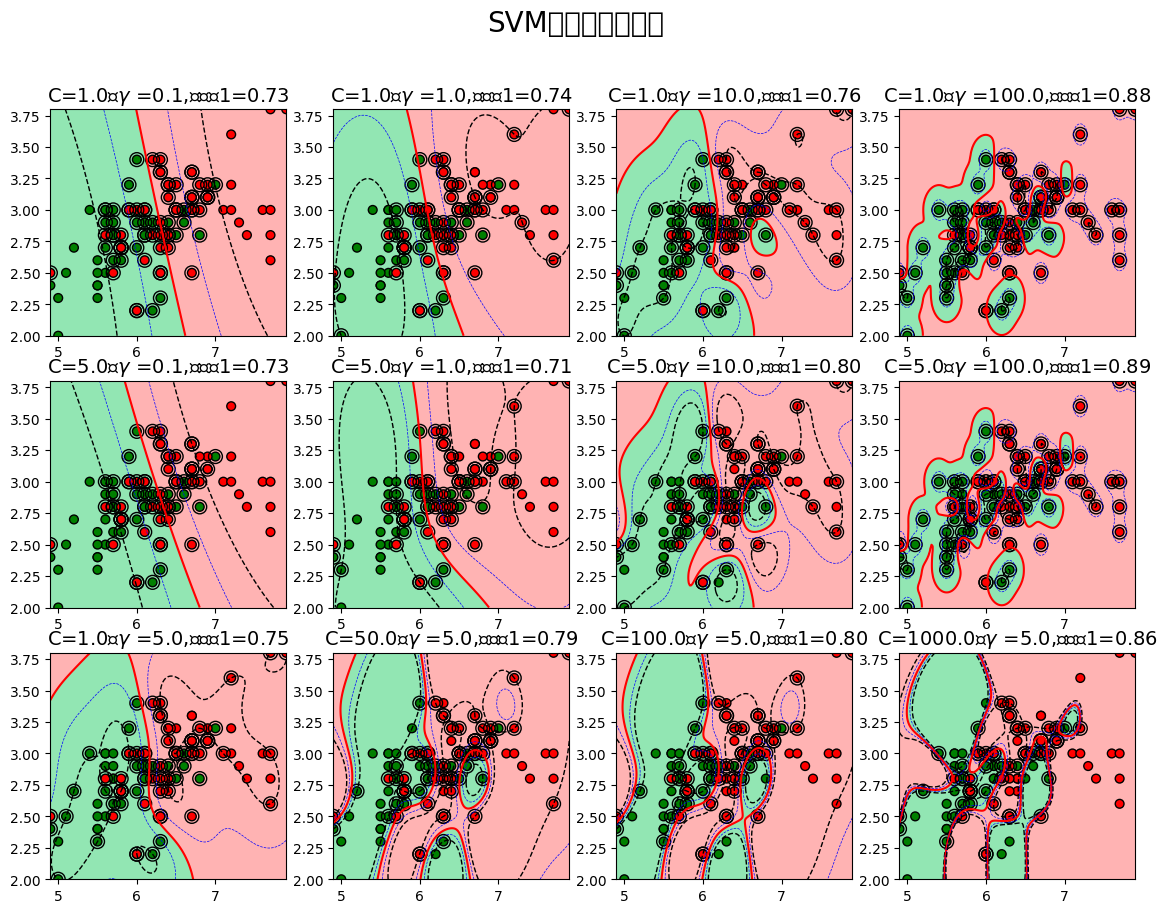

In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置中文字体和解决负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号 '-' 显示为方块的问题



if __name__ == "__main__":
    data = pd.read_csv('data/svm3.txt', sep='\t', header=None)
    x, y = data[[0, 1]], data[2]

    # 分类器
    clf_param = (('rbf', 1, 0.1), ('rbf', 1, 1), ('rbf', 1, 10), ('rbf', 1, 100),
                ('rbf', 5, 0.1), ('rbf', 5, 1), ('rbf', 5, 10), ('rbf', 5, 100),
    ('rbf', 1, 5), ('rbf', 50, 5), ('rbf', 100, 5), ('rbf', 1000,5))
    x1_min, x2_min = np.min(x, axis=0)
    x1_max, x2_max = np.max(x, axis=0)
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
    grid_test = np.stack((x1.flat, x2.flat), axis=1)

    cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FFA0A0'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r'])
    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(14, 10), facecolor='w')
    for i, param in enumerate(clf_param):
        clf = svm.SVC(C=param[1], kernel=param[0])
        clf.gamma = param[2]
#         if param[0] == 'rbf':
#             clf.gamma = param[2]
#             title = u'高斯核，C=%.1f，$\gamma$ =%.1f' % (param[1], param[2])
#         else:
#             title = u'线性核，C=%.1f' % param[1]

        clf.fit(x, y)
        y_hat = clf.predict(x)
#         print(u'准确率：', accuracy_score(y, y_hat))
        title = u'C=%.1f，$\gamma$ =%.1f,准确率1=%.2f' % (param[1], param[2],accuracy_score(y, y_hat))
        # 画图
#         print(title)
#         print(u'支撑向量的数目：', clf.n_support_)
#         print(u'支撑向量的系数：', clf.dual_coef_)
#         print(u'支撑向量：', clf.support_)
        plt.subplot(3, 4, i+1)
        grid_hat = clf.predict(grid_test)       # 预测分类值
        grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
        plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
        plt.scatter(x[0], x[1], c=y, edgecolors='k', s=40, cmap=cm_dark)      # 样本的显示
        plt.scatter(x.loc[clf.support_, 0], x.loc[clf.support_, 1], edgecolors='k', facecolors='none', s=100, marker='o')   # 支撑向量
        z = clf.decision_function(grid_test)

        z = z.reshape(x1.shape)
        plt.contour(x1, x2, z, colors=list('kbrbk'), linestyles=['--', '--', '-', '--', '--'],
                    linewidths=[1, 0.5, 1.5, 0.5, 1], levels=[-1, -0.5, 0, 0.5, 1])

        plt.xlim(x1_min, x1_max)
        plt.ylim(x2_min, x2_max)
        plt.title(title, fontsize=14)

    plt.suptitle(u'SVM不同参数的分类', fontsize=20)
#     plt.tight_layout(1.4)
#     plt.subplots_adjust(top=0.92)
    plt.show()


C: 惩罚系数，用来控制损失函数的惩罚系数，类似于LR中的正则化系数。C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样会出现训练集测试时准确率很高，但泛化能力弱，容易导致过拟合。 C值小，对误分类的惩罚减小，容错能力增强，泛化能力较强，但也可能欠拟合。

gamma: 核函数系数，该参数是rbf，poly和sigmoid的内核系数；默认是'auto'，那么将会使用特征位数的倒数，即1 / n_features。（即核函数的带宽，超圆的半径）。gamma越大，σ越小，使得高斯分布又高又瘦，造成模型只能作用于支持向量附近，可能导致过拟合；反之，gamma越小，σ越大，高斯分布会过于平滑，在训练集上分类效果不佳，可能导致欠拟合。